In [1]:
import warp as wp
import pyvista as pv
import numpy as np
from pyvista import CellType
from warp import vec3
from src.preprocess import Mesh

import warp as wp
wp.init()
import numpy as np
from warp.optim.linear import cg, bicgstab, gmres, preconditioner

np.random.seed(123)
n=5
A = np.eye(n)
b = np.random.randn(n)

x0 = wp.array(np.ones(n), dtype=float)
A0 = wp.array(A, dtype=float)
b0 = wp.array(b, dtype=float)
M0 = preconditioner(A0, 'diag')

end_iter, err, atol = gmres(A=A0, b=b0, x=x0, maxiter=10000)

Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 12.6
   Devices:
     "cpu"      : "AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD"
     "cuda:0"   : "NVIDIA GeForce RTX 2070 SUPER" (8 GiB, sm_75, mempool enabled)
   Kernel cache:
     C:\Users\John Su\AppData\Local\NVIDIA\warp\Cache\1.7.0
Module warp.optim.linear 1b0cd6f load on device 'cuda:0' took 270.85 ms  (compiled)
Module warp.optim.linear 3423524 load on device 'cuda:0' took 343.31 ms  (compiled)
Module warp.optim.linear 0dea380 load on device 'cuda:0' took 374.60 ms  (compiled)
Module warp.optim.linear 1ead64d load on device 'cuda:0' took 445.86 ms  (compiled)
Module warp.optim.linear 699fa56 load on device 'cuda:0' took 469.64 ms  (compiled)
Module warp.optim.linear 951635e load on device 'cuda:0' took 497.32 ms  (compiled)
Module warp.optim.linear e84aac2 load on device 'cuda:0' took 579.89 ms  (compiled)
Module warp.optim.linear 35c516d load on device 'cuda:0' took 653.80 ms  (compiled)


In [20]:
a = np.random.rand(50_000_0000)
b = wp.array(data = a,device='cuda:0')

In [1]:
import warp as wp
import warp.sparse as sparse
import numpy as np
from typing import Any
import scipy.sparse as sp_sparse

In [70]:
wp.init()

In [ ]:
ar = np.eye(12,12,dtype = np.float32)


rows, cols = np.nonzero(ar)


In [ ]:
a = wp.vec3(1.,2.,3.)
wp.cw_mul(a,a)

: 

In [67]:
@wp.kernel
def test_kernel(a:wp.array(dtype=int),b:wp.array(dtype=int),c:wp.array(dtype=int)):
    i = wp.tid()
    
    d = wp.vector(3,2,1,length=3,dtype=wp.int32)
    dd = wp.where(d == 3, 5,-1)
    c[i] = dd

    
    # wp.printf('%d', )
    # return d

In [68]:
a = wp.array([1,2,4])
b = wp.zeros(shape = 3,dtype= int)
c = wp.zeros(shape = 3,dtype= int)
# a.fill_(4)
b.fill_(2)
# wp.launch(kernel=test,dim = [3,], inputs= [a,b,c])

In [69]:
wp.launch(kernel=test_kernel,dim = 3, inputs= (a,b,c))

Module __main__ 066bc20 load on device 'cuda:0' took 195.19 ms  (error)


Exception: CUDA kernel build failed with error code 6

In [64]:
print(a,b,c)

[1 2 4] [2 2 2] [-1 -1  5]


In [59]:

wp.floordiv(3.,2.)

1.0

In [ ]:

warp_sparse = sparse.bsr_from_triplets(1,1,row,col,value)
print(warp_sparse)


BsrMatrix_float32(
	nrow=1,
	ncol=1,
	nnz=12,
	offsets=[0 1],
	columns=[ 0  1  2  3  4  5  6  7  8  9 10 11],
	values=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],
)


In [32]:
@wp.func
def get_vector_from_array(arr:wp.array(ndim= 2,dtype=Any),i:wp.int32):
    return wp.vector(arr[i][0],arr[i][1],arr[i][2],dtype= type(arr))


In [25]:
import numpy as np

# Example flattened velocity array
flat_velocities = wp.array([1, 2, 3, 4, 5, 6, 7, 8, 9],dtype=float)  # replace with your actual data

# Reshape to (N, 3) where N is the number of velocity vectors
flat_velocities =  flat_velocities.reshape((-1, 3))


In [15]:
import numpy as np

A = np.arange(30).reshape(6, 5)  # Example array with shape (6, 5)
rows = [0, 2, 4]
cols = [1, 3, 4]

# Use np.ix_ to get the submatrix
A[np.ix_(rows, cols)] = 99

np.ix_(rows, cols)


(array([[0],
        [2],
        [4]]),
 array([[1, 3, 4]]))

In [3]:
wp.init()

Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 12.6
   Devices:
     "cpu"      : "AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD"
     "cuda:0"   : "NVIDIA GeForce RTX 2070 SUPER" (8 GiB, sm_75, mempool enabled)
   Kernel cache:
     C:\Users\John Su\AppData\Local\NVIDIA\warp\Cache\1.7.0


e:\py312_torch_2-5\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


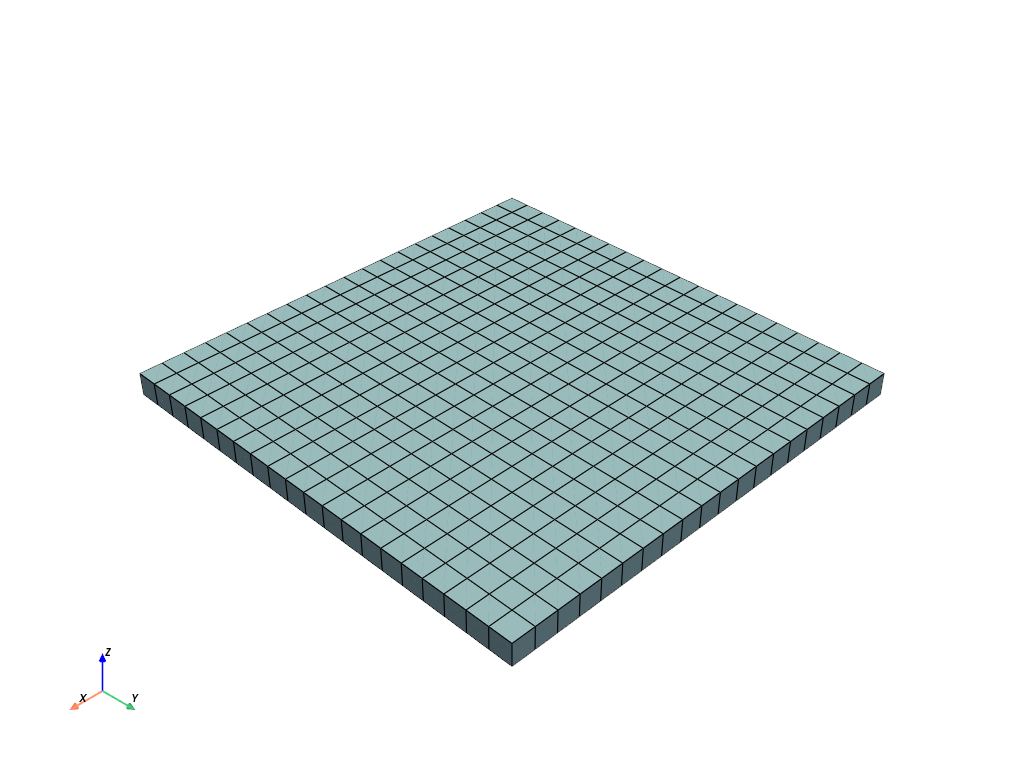

In [4]:
import pyvista as pv
import numpy as np
from src.preprocess.mesh import Mesh


values = np.linspace(0, 0.1, 100).reshape((10, 10, 1))
values.shape

# Create the spatial reference
grid = pv.ImageData()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array((20,20,1)) + 1

# Edit the spatial reference
grid.origin = (0, 0, 0)  # The bottom left corner of the data set
grid.spacing = (0.1, 0.1, 0.1)  # These are the cell sizes along each axis

# Add the data values to the cell data
# grid.cell_data['values'] = values.flatten(order='F')  # Flatten the array
# Now plot the grid
grid.plot(show_edges=True)

In [5]:
import pyvista as pv
import numpy as np
from pyvista import CellType

def make_hex_grid(nx, ny, nz, spacing=(1.0, 1.0, 1.0), origin=(0, 0, 0)):
    # Step 1: Create a structured grid (VTK_VOXEL)
    img = pv.ImageData(dimensions=(nx + 1, ny + 1, nz + 1), spacing=spacing, origin=origin)
    ugrid = img.cast_to_unstructured_grid()

    # Step 2: Convert voxel cells to hexahedron cells
    def voxel_to_hex(ugrid):
        new_cells = []
        new_types = []
        reorder = [0, 1, 3, 2, 4, 5, 7, 6]  # Voxel to Hex point ordering
        for i in range(ugrid.n_cells):
            cell = ugrid.get_cell(i)
            pts = cell.point_ids
            new_cells.append([8] + [pts[j] for j in reorder])
            new_types.append(CellType.HEXAHEDRON)
        cell_array = np.hstack(new_cells)
        return pv.UnstructuredGrid(cell_array, new_types, ugrid.points)

    hex_grid = voxel_to_hex(ugrid)
    return hex_grid





In [ ]:
def create_hex_grid(nx, ny, nz, spacing=(1.0, 1.0, 1.0), origin=(0, 0, 0)):
    # Create a 4×4×2 hex grid
    hex_grid = make_hex_grid(nx, ny, nz, spacing, origin)
    # Optional: add cell IDs for visualization
    hex_grid.cell_data["id"] = np.arange(hex_grid.n_cells)
    
    m = Mesh(hex_grid)
    faces = m.face_properties
    cells = m.cell_properties
    boundary_ids = m.face_properties.boundary_face_ids
    face_idx = faces.cell_face_index[boundary_ids,0]
    cell_ids = faces.adjacent_cells[boundary_ids,0]

    normals = cells.normal[cell_ids,face_idx]

    tol = 1e-3

    # Axis-aligned normal masks
    is_pos_x = np.abs(normals @ [1, 0, 0] - 1) < tol
    is_neg_x = np.abs(normals @ [-1, 0, 0] - 1) < tol
    is_pos_y = np.abs(normals @ [0, 1, 0] - 1) < tol
    is_neg_y = np.abs(normals @ [0, -1, 0] - 1) < tol
    is_pos_z = np.abs(normals @ [0, 0, 1] - 1) < tol
    is_neg_z = np.abs(normals @ [0, 0, -1] - 1) < tol

    # Step 5: Extract individual walls
    walls = {
        "+X": boundary_ids[is_pos_x],
        "-X": boundary_ids[is_neg_x],
        "+Y": boundary_ids[is_pos_y],
        "-Y": boundary_ids[is_neg_y],
        "+Z": boundary_ids[is_pos_z],
        "-Z": boundary_ids[is_neg_z],
    }
    
    m.add_groups(walls,'face')
    
    return m

e:\py312_torch_2-5\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


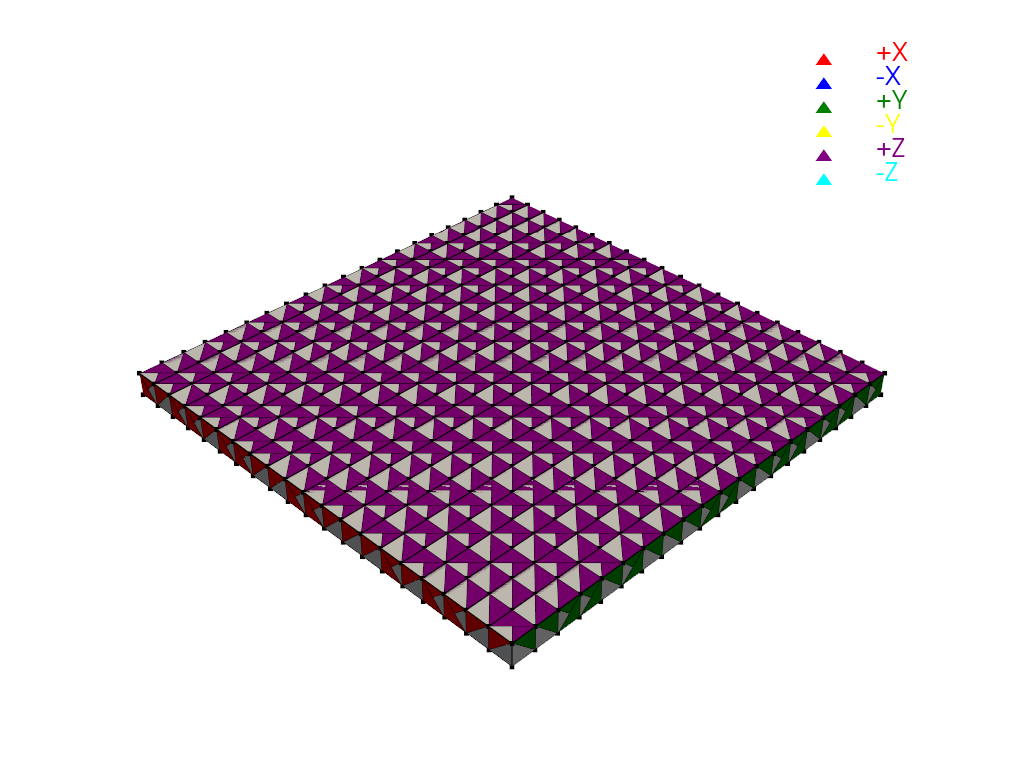

In [ ]:

m = create_hex_grid(10,10,1,(0.1,0.1,0.1))
get_vtk_faces = lambda boundary_ids,faces_array : np.hstack(np.concatenate((np.ones(( boundary_ids.shape[0],1),dtype=np.int32)*4,faces_array),axis = 1))


faces = m.face_properties
boundary_ids = faces.boundary_face_ids

nodes_list = np.unique(faces.unique_faces[boundary_ids])
points = m.nodes[nodes_list]


verts = pv.PolyData(points)

plotter = pv.Plotter()
plotter.add_mesh(m.pyvista_mesh, color="lightgray", show_edges=True)

colors = ["red", "blue", "green", "yellow", "purple", "cyan"]
for i, (name, wall) in enumerate(m.groups.items()):
    wall = wall.ids
    vtk_faces = get_vtk_faces(wall,faces.unique_faces[wall])
    face_polydata = pv.PolyData(points,faces = vtk_faces)
    plotter.add_mesh(face_polydata, color=colors[i], label=name, show_edges=True)

# plotter.add_mesh(face_polydata, color="red", label="Z")
plotter.add_mesh(verts,color = 'black')
plotter.add_legend()
plotter.show()

e:\py312_torch_2-5\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
e:\py312_torch_2-5\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


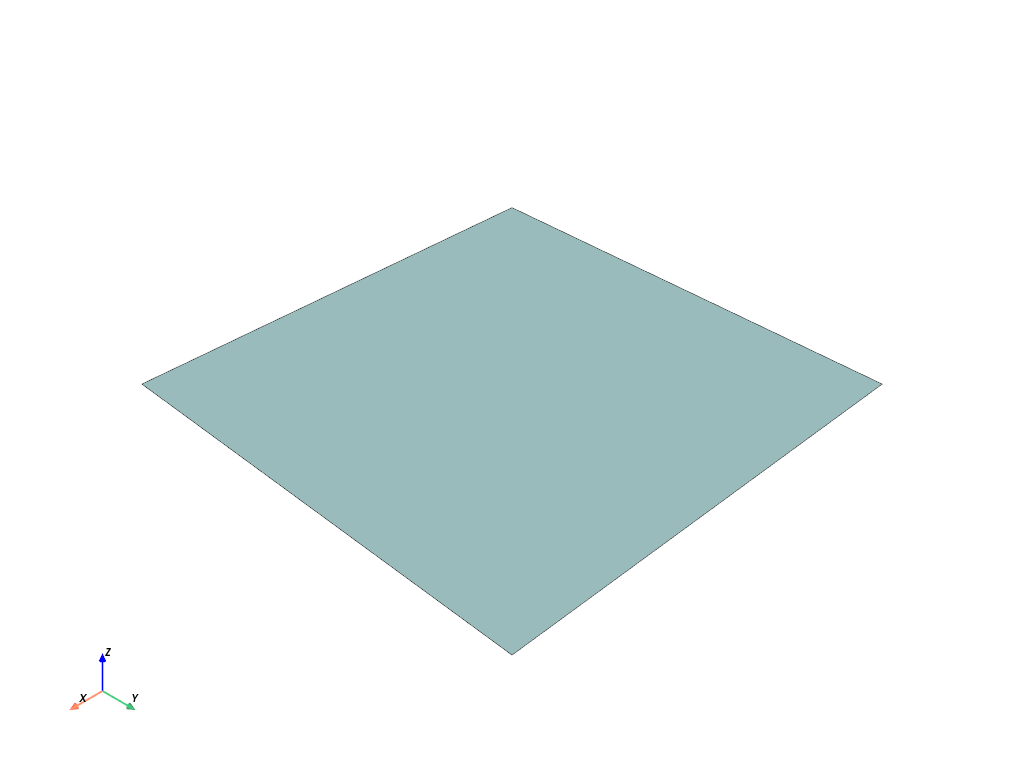

In [205]:
import pyvista as pv
import numpy as np

# Define points (vertices)
points = np.array([
    [0, 0, 0],   # point 0
    [1, 0, 0],   # point 1
    [1, 1, 0],   # point 2
    [0, 1, 0]    # point 3
])

# Define faces
# Each face definition starts with the number of points in the face (e.g., 3 for triangle, 4 for quad)
# Followed by the indices of the points that make up the face
faces = np.hstack([
    [4, 0, 1, 2, 3]  # single quad face
])


# Create a PolyData mesh
mesh = pv.PolyData(points, faces)

# Plot
mesh.plot(show_edges=True)


e:\py312_torch_2-5\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


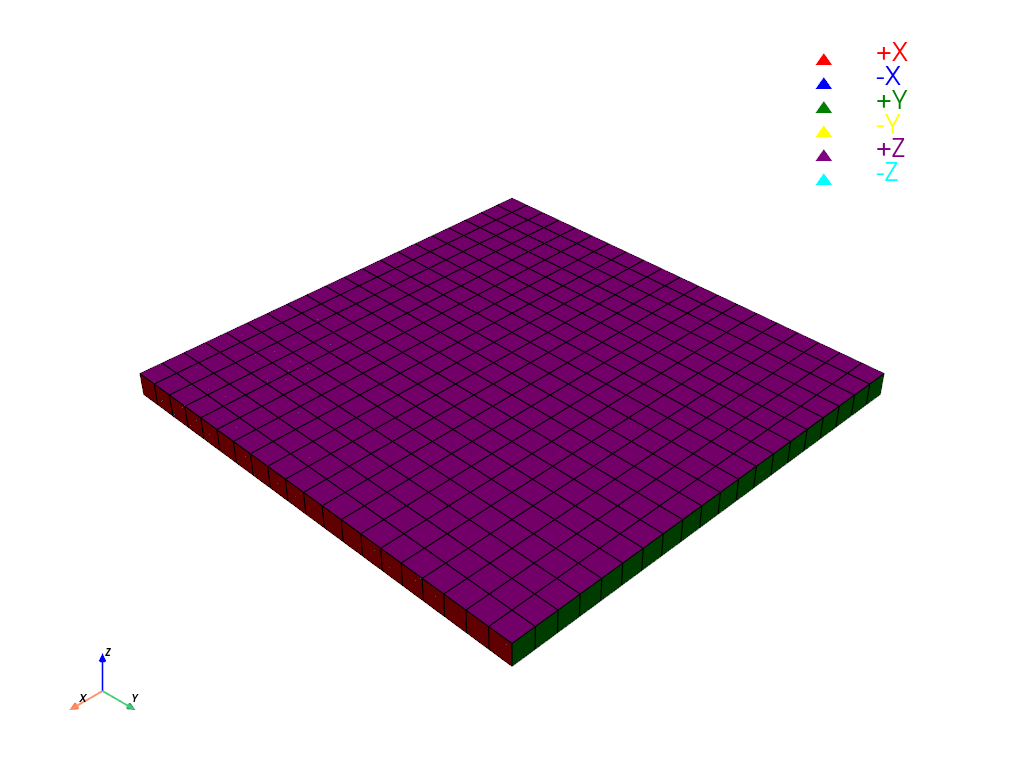

In [ ]:
grid["scalars"] = range(grid.n_cells)

# Step 2: Extract the boundary surface
surface = ugrid.extract_surface()

# Step 3: Compute face normals
surface.compute_normals(cell_normals=True, point_normals=False, inplace=True)

# Step 4: Classify faces by normal direction
normals = surface.cell_data["Normals"]
tol = 1e-3  # tolerance for direction matching

# Axis-aligned normal masks
is_pos_x = np.abs(normals @ [1, 0, 0] - 1) < tol
is_neg_x = np.abs(normals @ [-1, 0, 0] - 1) < tol
is_pos_y = np.abs(normals @ [0, 1, 0] - 1) < tol
is_neg_y = np.abs(normals @ [0, -1, 0] - 1) < tol
is_pos_z = np.abs(normals @ [0, 0, 1] - 1) < tol
is_neg_z = np.abs(normals @ [0, 0, -1] - 1) < tol

# Step 5: Extract individual walls
walls = {
    "+X": surface.extract_cells(is_pos_x),
    "-X": surface.extract_cells(is_neg_x),
    "+Y": surface.extract_cells(is_pos_y),
    "-Y": surface.extract_cells(is_neg_y),
    "+Z": surface.extract_cells(is_pos_z),
    "-Z": surface.extract_cells(is_neg_z),
}

# Step 6: Visualize
plotter = pv.Plotter()
plotter.show_axes()
colors = ["red", "blue", "green", "yellow", "purple", "cyan"]
for i, (name, wall) in enumerate(walls.items()):
    plotter.add_mesh(wall, color=colors[i], label=name, show_edges=True)
plotter.add_legend()
plotter.show()

In [ ]:
ugrid.extract_surface()

array([  8,   0,   1, ..., 860, 880, 881], dtype=int64)

e:\py312_torch_2-5\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


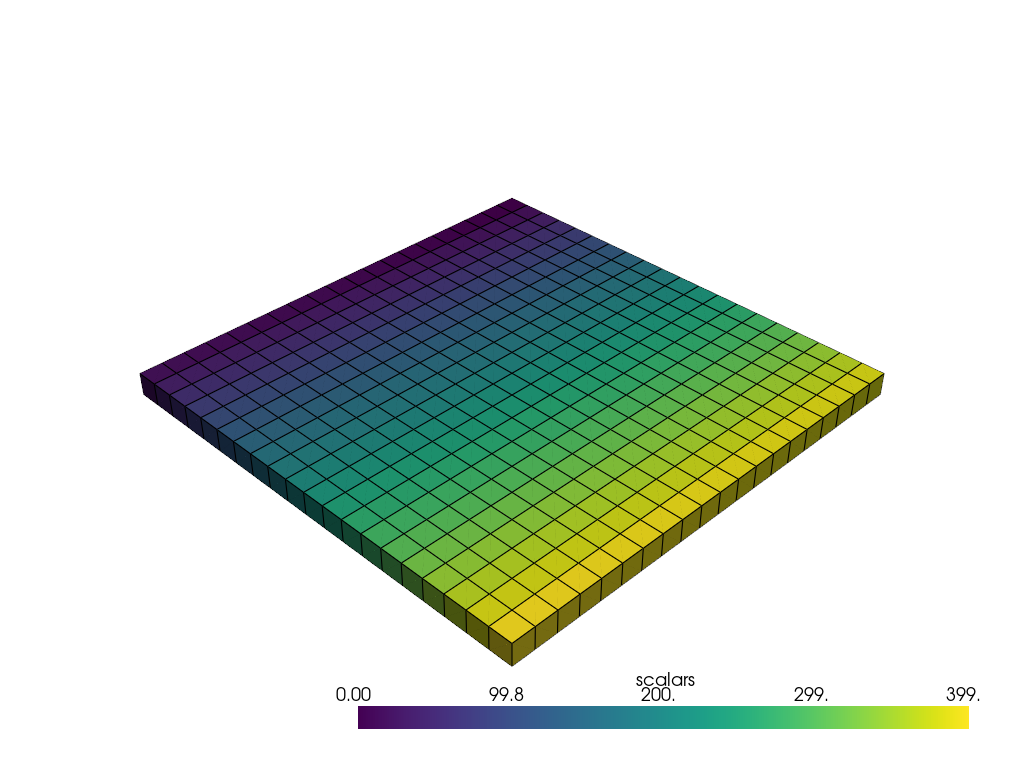

In [128]:
plotter = pv.Plotter()
plotter.add_mesh(ugrid, show_edges=True, scalars="scalars", cmap="viridis")
plotter.show()

In [91]:
a = np.arange(10)

mask = (a == 1)

a[mask]

array([1])

In [89]:
mat = wp.mat((2,3),dtype=wp.float32)

vec = wp.vec3


t = wp.zeros(3,dtype= mat)
w = wp.zeros(3,dtype= vec)

@wp.kernel
def test(arr:wp.array(dtype=mat)):
    i = wp.tid()
    arr[i][0][0] = 2.

@wp.kernel
def test_vec(arr:wp.array(dtype=vec)):
    i = wp.tid()
    arr[i][0] = 2.


@wp.kernel
def test_mat(arr:wp.array(dtype=mat)):
    i = wp.tid()

    c = wp.matrix_from_rows(wp.vector(1.,2.,3.,length=3,dtype=wp.float32),wp.vector(1.,2.,3.,length=3,dtype=wp.float32))
    arr[i] += c*3.
    # arr[i] += c


wp.launch(kernel=test_mat,dim = 3,inputs = [t])
wp.launch(kernel=test_vec,dim = 3,inputs = [w])

Module __main__ 54b24c5 load on device 'cuda:0' took 388.05 ms  (compiled)


In [90]:
t.numpy(),w.numpy()

(array([[[3., 6., 9.],
         [3., 6., 9.]],
 
        [[3., 6., 9.],
         [3., 6., 9.]],
 
        [[3., 6., 9.],
         [3., 6., 9.]]], dtype=float32),
 array([[2., 0., 0.],
        [2., 0., 0.],
        [2., 0., 0.]], dtype=float32))